In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Password:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
penguins_origin = sns.load_dataset("penguins")
penguins_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
penguins_origin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins_origin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins_origin.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

# 예제 1: 임의 표본 추출과 표본 평균 비교

In [6]:
penguins = penguins_origin.copy()

In [7]:
# 결측값을 제거
penguins = penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [8]:
# 모집단의 몸무게(body_mass_g) 평균을 계산
population_mean = penguins["body_mass_g"].mean()

In [9]:
print(population_mean)

4207.057057057057


In [10]:
# 30개씩 랜덤 샘플을 1000번 추출하여 표본 평균을 구함

sample_means = []  # 표본 평균을 저장할 리스트

for _ in range(1000):
    # 30개 랜덤 샘플 추출 (복원추출 : replace를 사용하면 추출한 값도 다음에 사용 가능)
    sample = penguins["body_mass_g"].sample(n=30, replace=True)
    sample_mean = sample.mean()  # 표본 평균 계산
    sample_means.append(sample_mean)  # 리스트에 저장


In [11]:
print(sample_means)

[4171.666666666667, 4092.5, 4245.0, 4265.833333333333, 4159.166666666667, 4264.166666666667, 4164.166666666667, 4385.833333333333, 4151.666666666667, 4267.5, 4385.0, 4267.5, 4112.5, 4263.333333333333, 3957.5, 4265.833333333333, 4269.166666666667, 4285.0, 4283.333333333333, 4110.833333333333, 4075.0, 4160.0, 4326.666666666667, 4124.166666666667, 4207.5, 4105.0, 4017.5, 4227.5, 4418.333333333333, 4077.5, 4219.166666666667, 4292.5, 3953.3333333333335, 4328.333333333333, 4104.166666666667, 4023.3333333333335, 4115.833333333333, 4151.666666666667, 4107.5, 4525.0, 4091.6666666666665, 4127.5, 3795.8333333333335, 4379.166666666667, 4098.333333333333, 4415.0, 3942.5, 4179.166666666667, 4510.833333333333, 4356.666666666667, 4415.0, 4109.166666666667, 4182.5, 4155.0, 4095.8333333333335, 4235.833333333333, 4533.333333333333, 4044.1666666666665, 4019.1666666666665, 3985.8333333333335, 4251.666666666667, 4105.0, 4005.8333333333335, 4193.333333333333, 4188.333333333333, 4255.0, 4250.0, 4121.666666666

In [12]:
# 리스트 컴프리헨션 사용
sample_means = [penguins["body_mass_g"].sample(30, replace=True).mean() for _ in range(1000)]

In [13]:
print(sample_means)

[4088.3333333333335, 4323.333333333333, 4406.666666666667, 4305.833333333333, 4299.166666666667, 4073.3333333333335, 4114.166666666667, 4255.0, 4370.833333333333, 4282.5, 4028.3333333333335, 4334.166666666667, 4159.166666666667, 4185.833333333333, 4256.666666666667, 4285.833333333333, 4210.0, 4115.833333333333, 4082.5, 4420.833333333333, 4132.5, 4297.5, 4071.6666666666665, 4395.0, 4105.0, 3970.0, 4375.0, 4117.5, 4520.833333333333, 4068.3333333333335, 4301.666666666667, 4057.5, 4194.166666666667, 4029.1666666666665, 4100.0, 4316.666666666667, 4272.5, 4451.666666666667, 3906.6666666666665, 4304.166666666667, 4098.333333333333, 3900.8333333333335, 4221.666666666667, 4195.0, 4061.6666666666665, 4092.5, 4200.0, 4144.166666666667, 4250.833333333333, 4318.333333333333, 4340.833333333333, 4146.666666666667, 4341.666666666667, 4389.166666666667, 4246.666666666667, 4363.333333333333, 4193.333333333333, 4050.0, 4155.0, 4195.833333333333, 4429.166666666667, 4460.0, 4002.5, 4130.0, 4202.5, 4456.666

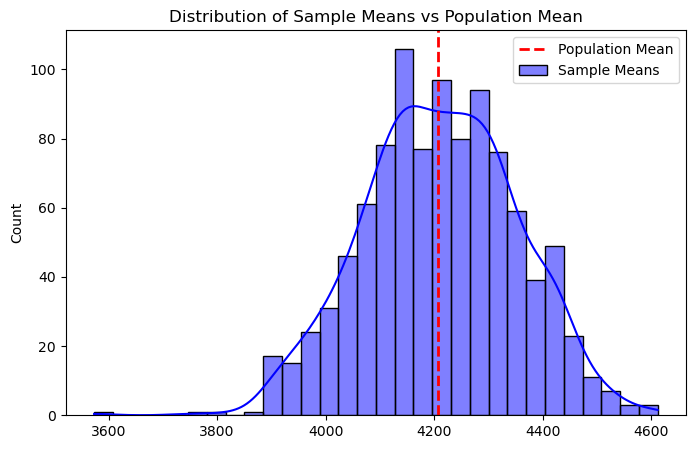

In [14]:
# 표본 평균의 분포를 시각화

# 1. 그래프 크기 설정
# 그래프의 크기를 너비 8, 높이 5로 설정
plt.figure(figsize=(8, 5))

# 2. 표본 평균들의 히스토그램 시각화
sns.histplot(sample_means, kde=True, bins=30, color='blue', label='Sample Means')
# sample_means : 리스트(또는 배열)에 저장된 표본 평균들을 히스토그램으로 표현
# [4145.0, 4044.1666666666665, 4231.666666666667, 4299.166666666667 ...]
# kde=True : 커널 밀도 추정(KDE) 그래프를 추가하여 분포를 부드럽게 표현
# bins=30 : 히스토그램을 30개의 구간(bin)으로 분할
# color='blue': 그래프 색상을 파란색으로 설정
# label='Sample Means': 범례(Label) 표기

# 3. 모집단 평균선을 추가
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
# 모집단 평균 (population_mean) 을 세로선(axvline) 으로 표시
# 4207.057057057057
# color='red': 색상을 빨간색으로 설정
# linestyle='dashed': 점선(dashed) 스타일로 표시
# linewidth=2: 선의 두께를 2로 설정
# label='Population Mean': 범례에 "Population Mean" 라벨 추가

# 4. 범례 추가
plt.legend()
# 그래프에서 범례(Legend) 를 추가하여, 그래프에 표시된 요소들의 의미를 표현

plt.title("Distribution of Sample Means vs Population Mean")  # 그래프 제목 설정
plt.show()